In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#     -O /tmp/sonnets.txt
data = open('../../tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [9]:
input_sequences[127]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 64, 23])

In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [5]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 6.9130 - accuracy: 0.0204
Epoch 2/100
15462/15462 [==============================] - 33s 2ms/sample - loss: 6.5003 - accuracy: 0.0217
Epoch 3/100
15462/15462 [==============================] - 38s 2ms/sample - loss: 6.3943 - accuracy: 0.0262
Epoch 4/100
15462/15462 [==============================] - 38s 2ms/sample - loss: 6.2652 - accuracy: 0.0316
Epoch 5/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 6.1707 - accuracy: 0.0378
Epoch 6/100
15462/15462 [==============================] - 38s 2ms/sample - loss: 6.0902 - accuracy: 0.0384
Epoch 7/100
15462/15462 [==============================] - 38s 2ms/sample - loss: 6.0057 - accuracy: 0.0400
Epoch 8/100
15462/15462 [==============================] - 37s 2ms/sample - loss: 5.9087 - accuracy: 0.0451
Epoch 9/100
15462/1

15462/15462 [==============================] - 38s 2ms/sample - loss: 1.4795 - accuracy: 0.7456
Epoch 74/100
15462/15462 [==============================] - 38s 2ms/sample - loss: 1.4687 - accuracy: 0.7438
Epoch 75/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 1.4404 - accuracy: 0.7501
Epoch 76/100
15462/15462 [==============================] - 38s 2ms/sample - loss: 1.4321 - accuracy: 0.7523
Epoch 77/100
15462/15462 [==============================] - 38s 2ms/sample - loss: 1.4063 - accuracy: 0.7559
Epoch 78/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 1.3840 - accuracy: 0.7628
Epoch 79/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 1.3667 - accuracy: 0.7641
Epoch 80/100
15462/15462 [==============================] - 37s 2ms/sample - loss: 1.3541 - accuracy: 0.7684
Epoch 81/100
15462/15462 [==============================] - 37s 2ms/sample - loss: 1.3498 - accuracy: 0.7667
Epoch 82/100
15462/15462 [======

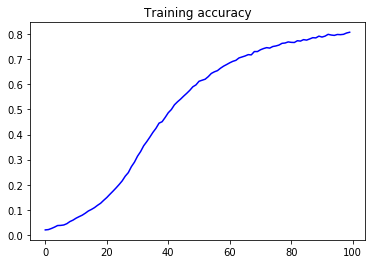

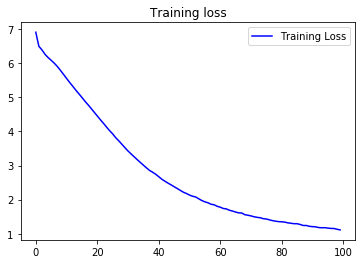

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)